In [ ]:
# todo: train test split. Remove last year for prediction. manually compute last year if needed

In [19]:
import pandas as pd 
df = pd.read_csv('ALL_DATA_Marc93.csv')
cpi = df['CPI'][0:358] # 358 non NaN
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults 
import numpy as np 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

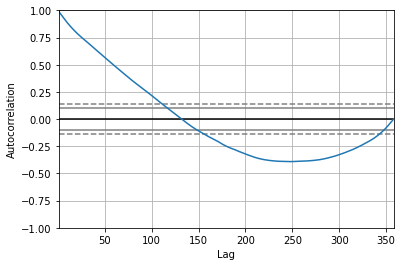

In [20]:
# no difference
autocorrelation_plot(cpi)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

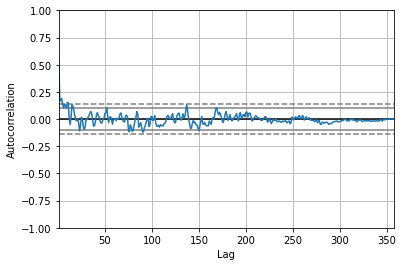

In [21]:
cpi_diff1 = np.diff(cpi)
autocorrelation_plot(cpi_diff1) 

In [45]:
# 1 diff was needed so d = 1 for ARIMA (p, d, q)
d = 1
for p in range(3):
    for q in range(3):
        print('p = ', p, '| q = ', q)
        model = ARIMA(cpi, order=(p,d,q))
        results_ARIMA = model.fit()
        print('aic = ', results_ARIMA.aic)
        print('bic = ', results_ARIMA.bic)
        print('==================NEXT MODEL==================')


p =  0 | q =  0
aic =  848.9114981250892
bic =  852.7892339068688
==================NEXT MODEL==================
p =  0 | q =  1
aic =  687.3120193284002
bic =  695.0674908919594
==================NEXT MODEL==================
p =  0 | q =  2
aic =  663.7818753453532
bic =  675.4150826906921
==================NEXT MODEL==================
p =  1 | q =  0
aic =  644.702946612579
bic =  652.4584181761383
==================NEXT MODEL==================
p =  1 | q =  1
aic =  646.18609019
bic =  657.8192975353388
==================NEXT MODEL==================
p =  1 | q =  2
aic =  605.9963998934785
bic =  621.5073430205971
==================NEXT MODEL==================
p =  2 | q =  0
aic =  646.5499850824203
bic =  658.1831924277592
==================NEXT MODEL==================
p =  2 | q =  1


c:\users\forre\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\forre\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


aic =  644.1858403074475
bic =  659.6967834345661
==================NEXT MODEL==================
p =  2 | q =  2
aic =  606.9028778198499
bic =  626.2915567287481
==================NEXT MODEL==================


In [46]:
# we see that the lowest aic and bcs are from p = 1 and q = 2

                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  358
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -298.998
Date:                Sat, 11 Feb 2023   AIC                            605.996
Time:                        11:21:06   BIC                            621.507
Sample:                             0   HQIC                           612.166
                                - 358                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9962      0.009    114.641      0.000       0.979       1.013
ma.L1         -0.4334      0.026    -16.489      0.000      -0.485      -0.382
ma.L2         -0.4613      0.030    -15.222      0.0

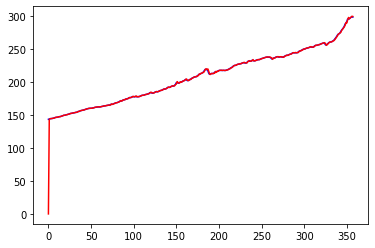

In [53]:
model = ARIMA(cpi, order=(1,d,2))
results_ARIMA = model.fit()
print(results_ARIMA.summary())
import matplotlib.pyplot as plt
plt.plot(cpi, color = 'blue')
plt.plot(results_ARIMA.fittedvalues, color='red') 
plt.show()